In [62]:
# libraries
import random
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import datetime
import fuzzywuzzy
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import warnings; warnings.filterwarnings("ignore")

# unhide all rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# for character encoding
import chardet

# for box-cox transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [63]:
nba = "2022-2023 NBA Player stats.csv"
players = pd.read_csv(nba, delimiter=";", encoding="latin-1", index_col=0)
players.head(10)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bam Adebayo,C,25,MIA,23,23,37.0,7.3,15.1,0.481,0.0,0.1,0.000,7.3,15.0,0.485,0.481,3.4,4.1,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9
2,Santi Aldama,PF,22,MEM,6,0,16.8,2.5,5.5,0.455,1.2,2.5,0.467,1.3,3.0,0.444,0.561,0.3,0.3,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5
3,Nickeil Alexander-Walker,SG,24,MIN,5,4,29.6,3.0,7.0,0.429,2.0,5.0,0.400,1.0,2.0,0.500,0.571,0.4,0.6,0.667,0.2,1.8,2.0,1.4,0.6,0.2,0.8,1.8,8.4
4,Grayson Allen,SG,27,MIL,5,5,29.8,3.8,8.2,0.463,2.8,5.8,0.483,1.0,2.4,0.417,0.634,1.2,1.4,0.857,0.2,2.2,2.4,1.8,0.4,0.0,0.8,1.4,11.6
5,Jarrett Allen,C,24,CLE,5,5,38.2,4.4,7.2,0.611,0.0,0.0,0.000,4.4,7.2,0.611,0.611,0.6,1.2,0.500,3.0,4.4,7.4,2.4,0.8,1.0,0.6,2.0,9.4
6,Kyle Anderson,PF,29,MIN,4,0,26.0,3.8,7.5,0.500,0.5,1.5,0.333,3.3,6.0,0.542,0.533,0.5,0.5,1.000,0.8,3.3,4.0,4.5,1.8,0.5,1.5,3.3,8.5
7,Giannis Antetokounmpo,PF,28,MIL,3,3,30.3,9.3,17.7,0.528,0.0,1.0,0.000,9.3,16.7,0.560,0.528,4.7,10.3,0.452,2.7,8.3,11.0,5.3,0.3,0.7,4.7,3.0,23.3
8,Thanasis Antetokounmpo,PF,30,MIL,2,0,2.5,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Deandre Ayton,C,24,PHO,10,10,31.9,6.1,11.1,0.550,0.0,0.0,0.000,6.1,11.1,0.550,0.550,1.2,2.3,0.522,2.9,6.8,9.7,1.0,0.6,0.7,1.7,3.5,13.4


In [64]:
players.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], dtype='object')

In [65]:
# get the number of missing data points per column
missing_values_count = players.isnull().sum()

# look at the number of missing points in the columns
missing_values_count[:]

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [66]:
Efficiency = players.PTS + players.TRB + players.AST + players.STL + players.BLK - (players.FGA - players.FG) - (players.FTA - players.FT) - players.TOV
players.insert(29, "EFF", Efficiency)
players.head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bam Adebayo,C,25,MIA,23,23,37.0,7.3,15.1,0.481,0.0,0.1,0.000,7.3,15.0,0.485,0.481,3.4,4.1,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9,21.9
2,Santi Aldama,PF,22,MEM,6,0,16.8,2.5,5.5,0.455,1.2,2.5,0.467,1.3,3.0,0.444,0.561,0.3,0.3,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5,9.2
3,Nickeil Alexander-Walker,SG,24,MIN,5,4,29.6,3.0,7.0,0.429,2.0,5.0,0.400,1.0,2.0,0.500,0.571,0.4,0.6,0.667,0.2,1.8,2.0,1.4,0.6,0.2,0.8,1.8,8.4,7.6
4,Grayson Allen,SG,27,MIL,5,5,29.8,3.8,8.2,0.463,2.8,5.8,0.483,1.0,2.4,0.417,0.634,1.2,1.4,0.857,0.2,2.2,2.4,1.8,0.4,0.0,0.8,1.4,11.6,10.8
5,Jarrett Allen,C,24,CLE,5,5,38.2,4.4,7.2,0.611,0.0,0.0,0.000,4.4,7.2,0.611,0.611,0.6,1.2,0.500,3.0,4.4,7.4,2.4,0.8,1.0,0.6,2.0,9.4,17.0
6,Kyle Anderson,PF,29,MIN,4,0,26.0,3.8,7.5,0.500,0.5,1.5,0.333,3.3,6.0,0.542,0.533,0.5,0.5,1.000,0.8,3.3,4.0,4.5,1.8,0.5,1.5,3.3,8.5,14.1
7,Giannis Antetokounmpo,PF,28,MIL,3,3,30.3,9.3,17.7,0.528,0.0,1.0,0.000,9.3,16.7,0.560,0.528,4.7,10.3,0.452,2.7,8.3,11.0,5.3,0.3,0.7,4.7,3.0,23.3,21.9
8,Thanasis Antetokounmpo,PF,30,MIL,2,0,2.5,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Deandre Ayton,C,24,PHO,10,10,31.9,6.1,11.1,0.550,0.0,0.0,0.000,6.1,11.1,0.550,0.550,1.2,2.3,0.522,2.9,6.8,9.7,1.0,0.6,0.7,1.7,3.5,13.4,17.6


In [67]:
players_C = players[players.Pos == "C"]
players_PG = players[players.Pos == "PG"]
players_SG = players[players.Pos == "SG"]
players_PF = players[players.Pos == "PF"]
players_SF = players[players.Pos == "SF"]

players_PG.head(50)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25,Malcolm Brogdon,PG,30,BOS,19,0,24.9,4.3,10.3,0.418,1.7,4.6,0.379,2.6,5.7,0.450,0.503,1.5,1.8,0.829,0.7,2.8,3.5,2.9,0.2,0.3,1.0,1.5,11.9,11.5
30,Jalen Brunson,PG,26,NYK,11,11,40.3,9.9,20.9,0.474,2.4,7.3,0.325,7.5,13.6,0.553,0.530,5.6,6.2,0.912,0.8,4.1,4.9,5.6,1.5,0.1,2.1,2.4,27.8,26.2
36,Jevon Carter,PG,27,MIL,4,0,12.3,0.5,2.3,0.222,0.3,1.8,0.143,0.3,0.5,0.500,0.278,0.0,0.0,0.000,0.0,1.0,1.0,1.0,0.3,0.0,0.0,0.3,1.3,1.8
42,Mike Conley,PG,35,MIN,5,5,36.6,4.0,8.4,0.476,2.0,4.4,0.455,2.0,4.0,0.500,0.595,2.0,2.2,0.909,0.4,2.2,2.6,6.4,0.6,0.0,1.4,2.2,12.0,15.6
48,Stephen Curry,PG,34,GSW,13,13,37.9,11.2,23.9,0.466,4.4,12.1,0.363,6.8,11.8,0.571,0.558,3.8,4.5,0.845,0.7,4.5,5.2,6.1,1.0,0.5,3.2,2.6,30.5,26.7
52,Spencer Dinwiddie,PG,29,BRK,4,4,39.8,5.5,12.8,0.431,1.8,4.5,0.389,3.8,8.3,0.455,0.500,3.8,5.5,0.682,0.3,3.0,3.3,6.5,1.3,0.3,3.0,1.8,16.5,15.9
55,Goran Dragi?,PG,36,MIL,2,0,3.5,0.0,1.0,0.000,0.0,0.5,0.000,0.0,0.5,0.000,0.000,2.0,2.0,1.000,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,2.0,1.5
62,De'Aaron Fox,PG,25,SAC,7,7,38.6,10.0,23.6,0.424,3.0,9.0,0.333,7.0,14.6,0.480,0.488,4.4,5.9,0.756,1.7,3.7,5.4,7.7,2.1,0.6,4.0,3.3,27.4,24.1
64,Darius Garland,PG,23,CLE,5,5,37.8,7.0,16.0,0.438,2.4,6.2,0.387,4.6,9.8,0.469,0.513,4.2,5.0,0.840,0.0,1.8,1.8,5.0,1.6,0.2,3.6,3.4,20.6,15.8


In [68]:
# Column Correlations Network
main_color = "#16a085"
strong_main_color = "#ffeb3b"
custom_colors = [strong_main_color, main_color]

df = players

<Axes: xlabel='Pos', ylabel='PTS'>

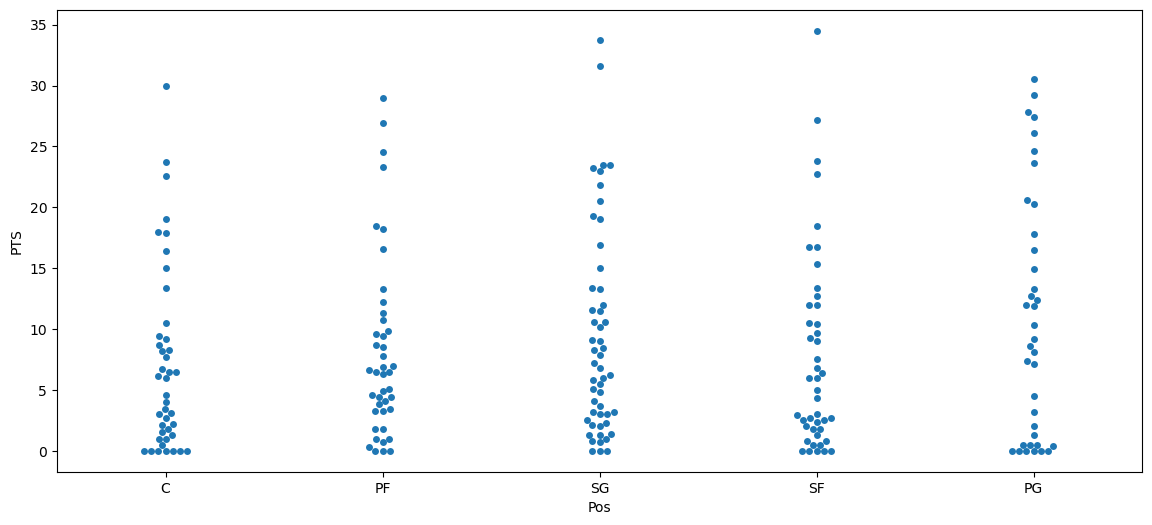

In [69]:
# points-position relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=players["Pos"],
              y=players["PTS"])

In [70]:
# points mean per position
print("Points mean C: " + str(round(players_C.PTS.mean())))
print("Points mean PG: " + str(round(players_PG.PTS.mean())))
print("Points mean SG: " + str(round(players_SG.PTS.mean())))
print("Points mean PF: " + str(round(players_PF.PTS.mean())))
print("Points mean SF: " + str(round(players_SF.PTS.mean())))

Points mean C: 7
Points mean PG: 11
Points mean SG: 9
Points mean PF: 8
Points mean SF: 8


In [71]:
Cs = pd.DataFrame(players_C.Player[(players_C.Age<=23)&(players_C.PTS>=10)&(players_C.EFF>=12)]).rename(columns={"Player": "Centers"}).reset_index(drop=True)
PGs = pd.DataFrame(players_PG.Player[(players_PG.Age<=23)&(players_PG.PTS>=10)&(players_PG.EFF>=12)]).rename(columns={"Player": "Point Guards"}).reset_index(drop=True)
SGs = pd.DataFrame(players_SG.Player[(players_SG.Age<=23)&(players_SG.PTS>=10)&(players_SG.EFF>=12)]).rename(columns={"Player": "Shooting Guards"}).reset_index(drop=True)
PFs = pd.DataFrame(players_PF.Player[(players_PF.Age<=23)&(players_PF.PTS>=10)&(players_PF.EFF>=12)]).rename(columns={"Player": "Power Forwards"}).reset_index(drop=True)
SFs = pd.DataFrame(players_SF.Player[(players_SF.Age<=23)&(players_SF.PTS>=10)&(players_SF.EFF>=12)]).rename(columns={"Player": "Small Forwards"}).reset_index(drop=True)

future = pd.concat([Cs, PGs, SGs, PFs, SFs], axis=1, join="outer")
future.index = np.arange(1, len(future)+1)
future

,Centers,Point Guards,Shooting Guards,Power Forwards,Small Forwards
1,Nic Claxton,Darius Garland,RJ Barrett,NaN,NaN
2,Jaren Jackson Jr.,Ja Morant,Anthony Edwards,NaN,NaN
3,NaN,NaN,Tyler Herro,NaN,NaN
4,NaN,NaN,Tyrese Maxey,NaN,NaN
